<a href="https://colab.research.google.com/github/vbaezfortunato/Python_class/blob/master/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [157]:
dt = pd.read_excel('/content/gdrive/My Drive/estaturas.xlsx')
dt.head(15)

,Estatura(metros),Edad(años)
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32
5,1.66,29
6,1.64,27
7,1.85,34
8,1.85,26
9,1.75,21


In [158]:

dt.describe()

,Estatura(metros),Edad(años)
count,29.000000,29.000000
mean,1.734483,28.310345
std,0.078175,4.683584
min,1.550000,21.000000
25%,1.680000,25.000000
50%,1.750000,27.000000
75%,1.790000,32.000000
max,1.850000,40.000000


**Histograma de Edad**

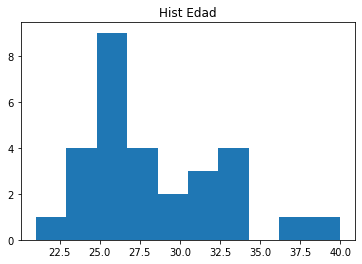

In [159]:

plt.hist(dt['Edad(años)'])
plt.title("Hist Edad")
plt.show()

**Histograma de Estaturas**

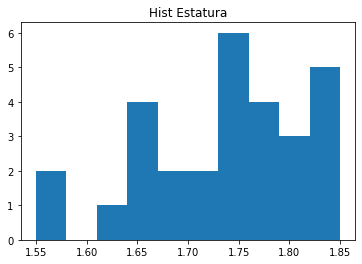

In [160]:
plt.hist(dt['Estatura(metros)'])
plt.title("Hist Estatura")
plt.show()

**Scatter Plot**

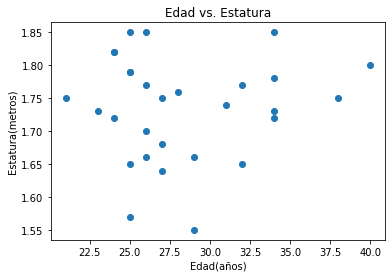

In [161]:

plt.scatter(dt['Edad(años)'], dt['Estatura(metros)'])
plt.title("Edad vs. Estatura")
plt.xlabel("Edad(años)")
plt.ylabel("Estatura(metros)")
plt.show()

**Variables Definition**

In [162]:

n_centers=5
centers=dt.sample(n=n_centers)
centers

,Estatura(metros),Edad(años)
8,1.85,26
3,1.78,34
13,1.65,25
10,1.73,23
14,1.79,25


In [163]:
dt.iloc[:,:2].values

array([[ 1.77, 26.  ],
       [ 1.74, 31.  ],
       [ 1.72, 24.  ],
       [ 1.78, 34.  ],
       [ 1.65, 32.  ],
       [ 1.66, 29.  ],
       [ 1.64, 27.  ],
       [ 1.85, 34.  ],
       [ 1.85, 26.  ],
       [ 1.75, 21.  ],
       [ 1.73, 23.  ],
       [ 1.79, 25.  ],
       [ 1.82, 24.  ],
       [ 1.65, 25.  ],
       [ 1.79, 25.  ],
       [ 1.72, 34.  ],
       [ 1.7 , 26.  ],
       [ 1.57, 25.  ],
       [ 1.66, 26.  ],
       [ 1.75, 27.  ],
       [ 1.77, 32.  ],
       [ 1.8 , 40.  ],
       [ 1.85, 25.  ],
       [ 1.82, 24.  ],
       [ 1.75, 38.  ],
       [ 1.73, 34.  ],
       [ 1.55, 29.  ],
       [ 1.76, 28.  ],
       [ 1.68, 27.  ]])

In [238]:
df = np.array(dt)
df

array([[ 1.77, 26.  ],
       [ 1.74, 31.  ],
       [ 1.72, 24.  ],
       [ 1.78, 34.  ],
       [ 1.65, 32.  ],
       [ 1.66, 29.  ],
       [ 1.64, 27.  ],
       [ 1.85, 34.  ],
       [ 1.85, 26.  ],
       [ 1.75, 21.  ],
       [ 1.73, 23.  ],
       [ 1.79, 25.  ],
       [ 1.82, 24.  ],
       [ 1.65, 25.  ],
       [ 1.79, 25.  ],
       [ 1.72, 34.  ],
       [ 1.7 , 26.  ],
       [ 1.57, 25.  ],
       [ 1.66, 26.  ],
       [ 1.75, 27.  ],
       [ 1.77, 32.  ],
       [ 1.8 , 40.  ],
       [ 1.85, 25.  ],
       [ 1.82, 24.  ],
       [ 1.75, 38.  ],
       [ 1.73, 34.  ],
       [ 1.55, 29.  ],
       [ 1.76, 28.  ],
       [ 1.68, 27.  ]])

**Arma kmean process**

In [185]:
randon_e = np.random.uniform(np.min(dt['Edad(años)']), np.max(dt['Edad(años)']), 3).reshape(-1,1)
randon_e

array([[39.69260563],
       [22.8700569 ],
       [31.97741137]])

In [186]:
randon_es = np.random.uniform(np.min(dt['Estatura(metros)']), np.max(dt['Estatura(metros)']), 3).reshape(-1,1)
randon_es

array([[1.62188934],
       [1.68976942],
       [1.57041395]])

In [187]:
centroids = np.concatenate((randon_e, randon_es), axis = 1)
centroids

array([[39.69260563,  1.62188934],
       [22.8700569 ,  1.68976942],
       [31.97741137,  1.57041395]])

In [188]:
output = list()

for i in range(0,3):
    out = np.sqrt(np.sum(np.square(np.subtract(dt_matrix,centroids[i])), axis = 1))
    output.append(out)

In [190]:
np.array(output).T

array([[45.08232799, 32.19005611, 38.8496123 ],
       [47.99451698, 36.13265727, 42.19480514],
       [44.07605489, 30.7420119 , 37.66427051],
       [49.8568723 , 38.5842131 , 44.31209434],
       [48.68335907, 37.00001206, 42.96174563],
       [46.86192521, 34.5791152 , 40.88432001],
       [45.73892539, 33.03517955, 39.58563344],
       [49.80366303, 38.5459958 , 44.26442101],
       [45.01505393, 32.1376742 , 38.78744114],
       [42.6046065 , 28.61715934, 35.93334401],
       [43.56814251, 30.01712733, 37.06930068],
       [44.53250017, 31.42826194, 38.21289452],
       [43.98993173, 30.6732992 , 37.58398317],
       [44.65171778, 31.52233596, 38.32358781],
       [44.53250017, 31.42826194, 38.21289452],
       [49.90251325, 38.61704167, 44.35300434],
       [45.14122685, 32.23598331, 38.90406552],
       [44.71989622, 31.5762454 , 38.38692705],
       [45.17489757, 32.26226627, 38.93520395],
       [45.64745144, 32.96459579, 39.50139548],
       [48.58964524, 36.93132111, 42.877

In [207]:
np.sqrt(((np.array(output).T - np.array(centroids[:, np.newaxis]).T)**2).sum(axis=2))

array([[12.77257366, 18.6872533 , 10.65470177, 22.41408989, 20.02860153,
        16.36564117, 14.06316978, 22.3369458 , 12.67255664,  7.56031339,
         9.59310891, 11.6425385 , 10.52574222, 11.82068872, 11.6425385 ,
        22.48032571, 12.86027171, 11.92280421, 12.91046084, 13.92731994,
        19.89170959, 30.375646  , 11.5664072 , 10.52574222, 27.70888367,
        22.46927923, 16.49760546, 15.06903782, 14.01372338],
       [64.87538705, 70.61922031, 62.84230619, 74.2607891 , 71.93634343,
        68.36631569, 66.13625722, 74.17980167, 64.76996797, 59.87886435,
        61.82312124, 63.78377412, 62.70624516, 63.97143074, 63.78377412,
        74.33029073, 64.96772629, 64.07882084, 65.0205323 , 65.99336513,
        71.79262507, 82.09529631, 63.70345802, 62.70624516, 79.46770226,
        74.31870176, 68.50487655, 67.09812318, 66.08426987]])

In [206]:
np.array(centroids[:, np.newaxis]).T

array([[[39.69260563, 22.8700569 , 31.97741137]],

       [[ 1.62188934,  1.68976942,  1.57041395]]])

In [213]:
clusters = np.argmin(np.array(output).T, axis = 1)

In [214]:
out = np.empty_like(centroids)
for i in range(0,3):
    out[i] = np.mean(dt_matrix[clusters == i],axis = 0)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [239]:
class KMeans:
    
    def __init__(self,df,k, verbosity):
        self.verbosity = verbosity
        self.df = df
        self.k = k
        self.edad_rand = np.random.uniform(np.min(df[:,0]), np.max(df[:,0]), self.k).reshape(-1,1)
        self.estatura_rand = np.random.uniform(np.min(df[:,1]), np.max(df[:,1]), self.k).reshape(-1,1)
        self.centroids = np.concatenate((self.edad_rand, self.estatura_rand), axis = 1)
        self.clusters = np.empty_like(df[:,0])
        self.min_distances = np.empty_like(df[:,0])
        self.error = 0 
        
    def Clusters(self):
        output = list()
        for i in range(0,self.k):
            out = np.sqrt(np.sum(np.square(np.subtract(self.df,self.centroids[i])), axis = 1))
            output.append(out)
        distances = np.array(output).T
        self.min_distances = np.min(distances, axis = 1)
        self.clusters = np.argmin(distances, axis = 1)
        
    def UpdateCentroids(self):
        self.Clusters()
        output_centroids = np.empty_like(self.centroids)
        for i in range(0,self.k):
            output_centroids[i] = np.mean(self.df[self.clusters == i],axis = 0)
        return output_centroids
                 
    def Fit(self):
        last_centroids = np.zeros_like(self.centroids)
        while not (last_centroids == self.UpdateCentroids()).all():
            last_centroids = self.UpdateCentroids()
            self.centroids = last_centroids
            if self.verbosity == True:
                print('centroides:')
                print(last_centroids)
                print("****************************************************************************************")
        self.error = np.mean(self.min_distances)
        return np.concatenate((self.df,self.clusters.reshape(-1,1)), axis = 1)

    def Predict(self, test):
        output = list()
        for i in range(0, self.k):
            out = np.sqrt(np.sum(np.square(np.subtract(test, self.centroids[i])), axis = 1))
            output.append(out)
        distances = np.array(output).T
        # min_distances = np.min(distances, axis = 1)
        clusters = np.argmin(distances, axis = 1)
        return clusters

In [253]:
K= KMeans(dt_matrix,7, True)

In [254]:
K.Fit()

centroides:
[[ 1.6775     29.25      ]
 [ 1.75       33.33333333]
 [ 1.75       25.16666667]
 [ 1.7        26.5       ]
 [ 1.75       21.        ]
 [ 1.775      39.        ]
 [ 1.7725     23.75      ]]
****************************************************************************************
centroides:
[[ 1.6775     29.25      ]
 [ 1.75       33.33333333]
 [ 1.73       25.        ]
 [ 1.72142857 26.42857143]
 [ 1.75       21.        ]
 [ 1.775      39.        ]
 [ 1.7725     23.75      ]]
****************************************************************************************


array([[ 1.77, 26.  ,  3.  ],
       [ 1.74, 31.  ,  0.  ],
       [ 1.72, 24.  ,  6.  ],
       [ 1.78, 34.  ,  1.  ],
       [ 1.65, 32.  ,  1.  ],
       [ 1.66, 29.  ,  0.  ],
       [ 1.64, 27.  ,  3.  ],
       [ 1.85, 34.  ,  1.  ],
       [ 1.85, 26.  ,  3.  ],
       [ 1.75, 21.  ,  4.  ],
       [ 1.73, 23.  ,  6.  ],
       [ 1.79, 25.  ,  2.  ],
       [ 1.82, 24.  ,  6.  ],
       [ 1.65, 25.  ,  2.  ],
       [ 1.79, 25.  ,  2.  ],
       [ 1.72, 34.  ,  1.  ],
       [ 1.7 , 26.  ,  3.  ],
       [ 1.57, 25.  ,  2.  ],
       [ 1.66, 26.  ,  3.  ],
       [ 1.75, 27.  ,  3.  ],
       [ 1.77, 32.  ,  1.  ],
       [ 1.8 , 40.  ,  5.  ],
       [ 1.85, 25.  ,  2.  ],
       [ 1.82, 24.  ,  6.  ],
       [ 1.75, 38.  ,  5.  ],
       [ 1.73, 34.  ,  1.  ],
       [ 1.55, 29.  ,  0.  ],
       [ 1.76, 28.  ,  0.  ],
       [ 1.68, 27.  ,  3.  ]])

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components = 5)

gmm.fit(dt_matrix)

In [ ]:
gmm.predict(dt_matrix)

In [ ]:

plt.scatter(dt_matrix[:,0], dt_matrix[:,1], c = gmm.predict(dt_matrix))
plt.show()

In [ ]:
gmm.predict_proba(dt_matrix)

In [260]:

model_list = list()
for i in range(1,7):
    print(i)
    model = KMeans(df, k = i, verbosity = False)
    model_list.append(model)

1
2
3
4
5
6


In [261]:
error_list = list()
for i in model_list:
    i.Fit()
    error = i.error
    error_list.append(error)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


KeyboardInterrupt: ignored

In [258]:
    error_list

[3.835293925750108, 1.681819029148096, 1.382701033164735, 1.0194214395985468]

ValueError: ignored

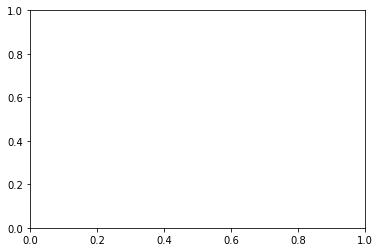

In [259]:
plt.plot(np.array([1,2,3,4,5,6], dtype = np.int32), error_list)
plt.scatter(np.array([1,2,3,4,5,6], dtype = np.int32), error_list)
plt.title("K means Distortion error")
plt.xlabel("K")
plt.ylabel("Distortion error")
plt.xticks([1,2,3,4,5,6])
plt.show()

**Convert to dataframe to matrix**

In [ ]:
dt_matrix[:, 0], dt_matrix[:, 1] = dt_matrix[:, 1], dt_matrix[:, 0].copy()

In [ ]:
n =list()
for i in range(0,3):
 c = np.sqrt(np.sum(np.square(np.subtract(dt_matrix,centroins[i])), axis = 1))
n.append(c)

In [ ]:
np.array(n)